# Classification Exercises 
#### Corey Solitaire
#### 9/8/2020

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from math import sqrt
from scipy import stats

# Data Acquisition

# 1 In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:
iris = sns.load_dataset('iris')

###   - print the first 3 rows
    

In [3]:
print(iris.head(3))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


###     - print the number of rows and columns (shape)
    

In [4]:
print(iris.shape)

(150, 5)


###    - print the column names
    

In [5]:
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


###    - print the data type of each column
    

In [6]:
print(iris.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [7]:
#more info is necessary
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


###     - print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [8]:
print(iris.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [9]:
print(iris.sepal_length.var(),
iris.sepal_width.var(),
iris.petal_length.var(),
iris.petal_width.var())

0.6856935123042505 0.1899794183445188 3.1162778523489942 0.5810062639821029


#### Petal length is much more variable then other measurments, I might reccomend scaling depending on the factors being examined

# 2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [10]:
customer = pd.read_excel('Spreadsheets_Exercises.xlsx')
customer.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


###      -assign the first 100 rows to a new dataframe, df_excel_sample

In [11]:
df_excel_sample = customer.head(100)
df_excel_sample.info

<bound method DataFrame.info of    customer_id  gender  is_senior_citizen partner dependents  phone_service  \
0   0002-ORFBO  Female                  0     Yes        Yes              1   
1   0003-MKNFE    Male                  0      No         No              2   
2   0004-TLHLJ    Male                  0      No         No              1   
3   0011-IGKFF    Male                  1     Yes         No              1   
4   0013-EXCHZ  Female                  1     Yes         No              1   
..         ...     ...                ...     ...        ...            ...   
95  0164-APGRB  Female                  0      No         No              2   
96  0164-XAIRP  Female                  0      No         No              1   
97  0168-XZKBB  Female                  0     Yes         No              2   
98  0174-QRVVY    Male                  0     Yes        Yes              2   
99  0177-PXBAT    Male                  1     Yes         No              2   

    internet_servic

###      -print the number of rows of your original dataframe

In [12]:
print(customer.shape)

(7049, 12)


In [13]:
#alternate option
customer.shape[0]

7049

###      -print the first 5 column names

In [14]:
print("Select First 5 columns:")
print(customer[['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']])

Select First 5 columns:
     customer_id  gender  is_senior_citizen partner dependents
0     0002-ORFBO  Female                  0     Yes        Yes
1     0003-MKNFE    Male                  0      No         No
2     0004-TLHLJ    Male                  0      No         No
3     0011-IGKFF    Male                  1     Yes         No
4     0013-EXCHZ  Female                  1     Yes         No
...          ...     ...                ...     ...        ...
7044  9987-LUTYD  Female                  0      No         No
7045  9992-RRAMN    Male                  0     Yes         No
7046  9992-UJOEL    Male                  0      No         No
7047  9993-LHIEB    Male                  0     Yes        Yes
7048  9995-HOTOH    Male                  0     Yes        Yes

[7049 rows x 5 columns]


In [15]:
# alternate method

customer.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

###      -print the column names that have a data type of object

In [16]:
filteredColumns = customer.dtypes[customer.dtypes == np.object]
listOfColumnNames = list(filteredColumns.index)
print(listOfColumnNames)

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']


###     -compute the range for each of the numeric variables.

In [17]:
#Transcribes table
stats =customer._get_numeric_data().describe().T
stats

,count,mean,std,min,25%,50%,75%,max
is_senior_citizen,7049.0,0.162009,0.368485,0.00,0.0000,0.00,0.000,1.00
phone_service,7049.0,1.324585,0.642709,0.00,1.0000,1.00,2.000,2.00
internet_service,7049.0,1.222585,0.779068,0.00,1.0000,1.00,2.000,2.00
contract_type,7049.0,0.690878,0.833757,0.00,0.0000,0.00,1.000,2.00
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80


In [18]:
stats['range'] = stats['max'] - stats['min']
stats[['mean', '50%', 'std', 'range']]

,mean,50%,std,range
is_senior_citizen,0.162009,0.00,0.368485,1.0
phone_service,1.324585,1.00,0.642709,2.0
internet_service,1.222585,1.00,0.779068,2.0
contract_type,0.690878,0.00,0.833757,2.0
monthly_charges,64.747014,70.35,30.099460,100.5
total_charges,2283.043883,1397.10,2266.521984,8666.0


# 3. Read the data from this google sheet into a dataframe, df_google

In [19]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###    -print the first 3 rows

In [20]:
print(df_googlesheet.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


###    -print the number of rows and columns

In [21]:
df_googlesheet.shape

(891, 12)

###    -print the first five column names

In [22]:
df_googlesheet.columns[:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [23]:
# alternate print to list for ease of access
df_googlesheet.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

###     -print the data type of each column

In [24]:
df_googlesheet.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

###     -print the summary statistics for each of the numeric variables

In [25]:
df_googlesheet._get_numeric_data().describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###   -print the unique values for each of your categorical variables

In [26]:
#df_googlesheet.select_dtypes(object)

df_ = df_googlesheet.select_dtypes(exclude=['int', 'float'])
for col in df_.columns:
    print(df_[col].unique()) # to print categories name only
    print(df_[col].value_counts())

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 'Todoro

In [27]:
#alternate from faith
for col in df_googlesheet:
    if df_googlesheet[col].dtypes == 'object':
        print(f'{col} has {df_googlesheet[col].nunique()} unique values.')

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


# Make a new python module, acquire.py to hold the following data aquisition functions:

### 1. Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database. 

In [28]:
import env

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

df = pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db'))

df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


### 2. Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database. 

In [29]:
def get_iris_data():
    return pd.read_sql('SELECT * FROM measurements AS m JOIN species AS s on m.species_id = s.species_id', get_connection('iris_db'))

df = get_iris_data()
df.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,5,5.0,3.6,1.4,0.2,1,1,setosa


### 3. Once you've got your get_titanic_data and get_iris_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for a local filename like titanic.csv or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name. 

In [30]:
#Titanic Dataset

# def get_titanic_data():
#     filename = "titanic.csv"

#     if os.path.isfile(filename):
#         return pd.read_csv(filename)
#     else:
#         # read the SQL query into a dataframe
#         df = pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db'))

#         # Write that dataframe to disk for later. Called "caching" the data for later.
#         df.to_csv(filename, index = False)

#         # Return the dataframe to the calling code
#     return df

#import acquire
#acquire.get_titanic_data()


In [31]:
#Iris Dataset

# def get_iris_data():
#     filename = "iris.csv"

#     if os.path.isfile(filename):
#        return pd.read_csv(filename)
#     else:
#         #read the SQL query into a dataframe
#         df = pd.read_sql('SELECT * FROM measurements AS m JOIN species AS s on m.species_id = s.species_id', get_connection('iris_db'))

#         #Write that dataframe to disk for later. Called "caching" the data for later.
#         df.to_csv(filename, index = False)

#         #Return the dataframe to the calling code
#     return df

#import acquire
#acquire.get_iris_data()

# Data Preparation

#### - Prepare Enviroment

In [32]:
import pandas as pd
import numpy as np
import acquire

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler



- Iris Data

    - Use the function defined in acquire.py to load the iris data.
    - Drop the species_id and measurement_id columns.
    - Rename the species_name column to just species.
    - Encode the species name using a sklearn label encoder. Research the inverse_transform method of the label encoder. How might this be useful?
    - Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.


In [33]:
 
'''
This function reads in iris data from Codeup database if cached == False
or if cached == True reads in iris df from a csv file, returns df
'''
# I ran this code first, to import data and save it as a dataframe
#iris = get_iris_data(cached=True)

iris = acquire.get_iris_data(cached=True)
iris.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [34]:
# Drop the species_id and measurement_id columns.

cols_to_drop = ['species_id']
iris = iris.drop(columns=cols_to_drop)
iris.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [35]:
# Rename the species_name column to just species.

iris.rename(columns = {'species_name':'species'}, inplace = True)
iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [36]:
# Train/Validate/Test Split

train_validate, test = train_test_split(iris, test_size=.2, 
                                        random_state=123, 
                                        stratify=iris.species)

train_validate.shape, test.shape


((120, 5), (30, 5))

In [37]:
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.species)
train.shape, validate.shape


((84, 5), (36, 5))

In [38]:
iris = acquire.get_iris_data(cached=True)
iris.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [39]:
# We do not need to use sklearn, we can just make dummy variables

df_dummies = pd.get_dummies(iris[['species_name']], drop_first=[True, True])
iris = pd.concat([iris, df_dummies], axis=1)
iris.head

<bound method NDFrame.head of      species_id species_name  sepal_length  sepal_width  petal_length  \
0             1       setosa           5.1          3.5           1.4   
1             1       setosa           4.9          3.0           1.4   
2             1       setosa           4.7          3.2           1.3   
3             1       setosa           4.6          3.1           1.5   
4             1       setosa           5.0          3.6           1.4   
..          ...          ...           ...          ...           ...   
145           3    virginica           6.7          3.0           5.2   
146           3    virginica           6.3          2.5           5.0   
147           3    virginica           6.5          3.0           5.2   
148           3    virginica           6.2          3.4           5.4   
149           3    virginica           5.9          3.0           5.1   

     petal_width  species_name_versicolor  species_name_virginica  
0            0.2         

In [40]:
# Encode the species name using a sklearn label encoder. 
# Research the inverse_transform method of the label encoder. How might this be useful?

def label_encode(train, test):
    le = LabelEncoder()
    train['species'] = le.fit_transform(train.species)
    test['species'] = le.transform(test.species)
    return le, train, test

In [41]:
label_encode(train, test)

<ipython-input-40-9a45e7c0204e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['species'] = le.fit_transform(train.species)


(LabelEncoder(),
      species  sepal_length  sepal_width  petal_length  petal_width
 79         1           5.7          2.6           3.5          1.0
 36         0           5.5          3.5           1.3          0.2
 133        2           6.3          2.8           5.1          1.5
 95         1           5.7          3.0           4.2          1.2
 18         0           5.7          3.8           1.7          0.3
 ..       ...           ...          ...           ...          ...
 11         0           4.8          3.4           1.6          0.2
 85         1           6.0          3.4           4.5          1.6
 55         1           5.7          2.8           4.5          1.3
 44         0           5.1          3.8           1.9          0.4
 73         1           6.1          2.8           4.7          1.2
 
 [84 rows x 5 columns],
      species  sepal_length  sepal_width  petal_length  petal_width
 80         1           5.5          2.4           3.8          1.1
 45  

In [42]:
# Research the inverse_transform method of the label encoder. How might this be useful?

'''
Used to transform the data back in to categories after modeling for analysis
'''


'\nUsed to transform the data back in to categories after modeling for analysis\n'

In [43]:
#Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

def prep_iris(df):
    le = LabelEncoder()
    df = df.drop(columns='species_id')
    df = df.rename(columns={'species_name': 'species'})
    train, test = train_test_split(df, train_size=.75, stratify=df.species, random_state=123)
    train, test, le = label_encode(train, test)
    return le, train, test


In [44]:
prep_iris(iris)

<ipython-input-40-9a45e7c0204e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['species'] = le.fit_transform(train.species)
<ipython-input-40-9a45e7c0204e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['species'] = le.transform(test.species)


(     species  sepal_length  sepal_width  petal_length  petal_width  \
 135        2           7.7          3.0           6.1          2.3   
 34         0           4.9          3.1           1.5          0.2   
 61         1           5.9          3.0           4.2          1.5   
 117        2           7.7          3.8           6.7          2.2   
 42         0           4.4          3.2           1.3          0.2   
 38         0           4.4          3.0           1.3          0.2   
 65         1           6.7          3.1           4.4          1.4   
 125        2           7.2          3.2           6.0          1.8   
 80         1           5.5          2.4           3.8          1.1   
 19         0           5.1          3.8           1.5          0.3   
 64         1           5.6          2.9           3.6          1.3   
 33         0           5.5          4.2           1.4          0.2   
 115        2           6.4          3.2           5.3          2.3   
 146  

# Titanic Data

####     Use the function you defined in acquire.py to load the titanic data set.

In [45]:
'''
This function reads in titanic data from Codeup database if cached == False
or if cached == True reads in iris df from a csv file, returns df
'''
# I ran this code first, to import data and save it as a dataframe
#iris = get_iris_data(cached=True)

titanic = acquire.get_titanic_data(cached=True)
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


####     Handle the missing values in the embark_town and embarked columns.

In [46]:
# Dropped these colums because they are repeats, or do not provide extra insight in to who survived
cols_to_drop = ['embarked', 'class', 'passenger_id']
titanic = titanic.drop(columns=cols_to_drop)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,None,Southampton,0
1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,None,Southampton,1
3,1,1,female,35.0,1,0,53.1000,C,Southampton,0
4,0,3,male,35.0,0,0,8.0500,None,Southampton,1


In [47]:
# drop missing observations of embark town
titanic = titanic[~titanic.embark_town.isnull()]

####     Remove the deck column.

In [48]:
cols_to_drop = ['deck']
titanic = titanic.drop(columns=cols_to_drop)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1


####    Use a label encoder to transform the embarked column.

In [49]:
#first we have to train/validate/test split data

train_validate, test = train_test_split(titanic, test_size=.2, 
                                        random_state=123, 
                                        stratify=titanic.survived)

train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.survived)

In [50]:
train.isnull().sum()

survived        0
pclass          0
sex             0
age            97
sibsp           0
parch           0
fare            0
embark_town     0
alone           0
dtype: int64

In [51]:
test.isnull().sum()

survived        0
pclass          0
sex             0
age            44
sibsp           0
parch           0
fare            0
embark_town     0
alone           0
dtype: int64

In [52]:
def label_encode(train, test):
    le = LabelEncoder()
    train['embark_town'] = le.fit_transform(train.embark_town)
    test['embark_town'] = le.transform(test.embark_town)
    return le, train, test

In [53]:
label_encode(train, test)

<ipython-input-52-9117e2cbdc08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['embark_town'] = le.fit_transform(train.embark_town)
<ipython-input-52-9117e2cbdc08>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['embark_town'] = le.transform(test.embark_town)


(LabelEncoder(),
      survived  pclass     sex   age  sibsp  parch      fare  embark_town  \
 583         0       1    male  36.0      0      0   40.1250            0   
 337         1       1  female  41.0      0      0  134.5000            0   
 50          0       3    male   7.0      4      1   39.6875            2   
 218         1       1  female  32.0      0      0   76.2917            0   
 31          1       1  female   NaN      1      0  146.5208            0   
 ..        ...     ...     ...   ...    ...    ...       ...          ...   
 313         0       3    male  28.0      0      0    7.8958            2   
 636         0       3    male  32.0      0      0    7.9250            2   
 222         0       3    male  51.0      0      0    8.0500            2   
 485         0       3  female   NaN      3      1   25.4667            2   
 553         1       3    male  22.0      0      0    7.2250            0   
 
      alone  
 583      1  
 337      1  
 50       0  
 

####     Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this?

In [54]:
def scale_columns(train, test):
    scaler = MinMaxScaler()
    train[['age','fare']] = scaler.fit_transform(train[['age','fare']])
    test[['age','fare']] = scaler.transform(test[['age','fare']])
    return scaler, train, test

In [55]:
scale_columns(train, test)

<ipython-input-54-4aadc00efd7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[['age','fare']] = scaler.fit_transform(train[['age','fare']])
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-54-4aadc00efd7a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

(MinMaxScaler(),
      survived  pclass     sex       age  sibsp  parch      fare  embark_town  \
 583         0       1    male  0.445355      0      0  0.078319            0   
 337         1       1  female  0.508383      0      0  0.262527            0   
 50          0       3    male  0.079793      4      1  0.077465            2   
 218         1       1  female  0.394933      0      0  0.148911            0   
 31          1       1  female       NaN      1      0  0.285990            0   
 ..        ...     ...     ...       ...    ...    ...       ...          ...   
 313         0       3    male  0.344510      0      0  0.015412            2   
 636         0       3    male  0.394933      0      0  0.015469            2   
 222         0       3    male  0.634438      0      0  0.015713            2   
 485         0       3  female       NaN      3      1  0.049708            2   
 553         1       3    male  0.268877      0      0  0.014102            0   
 
      alo

####     Fill the missing values in age. The way you fill these values is up to you. Consider the tradeoffs of different methods.

In [56]:
def impute_age(train, test):
    avg_age = train.age.mean()
    train.age = train.age.fillna(avg_age)
    test.age = test.age.fillna(avg_age)
    return train, test

In [57]:
impute_age(train, test)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(     survived  pclass     sex       age  sibsp  parch      fare  embark_town  \
 583         0       1    male  0.445355      0      0  0.078319            0   
 337         1       1  female  0.508383      0      0  0.262527            0   
 50          0       3    male  0.079793      4      1  0.077465            2   
 218         1       1  female  0.394933      0      0  0.148911            0   
 31          1       1  female  0.368674      1      0  0.285990            0   
 ..        ...     ...     ...       ...    ...    ...       ...          ...   
 313         0       3    male  0.344510      0      0  0.015412            2   
 636         0       3    male  0.394933      0      0  0.015469            2   
 222         0       3    male  0.634438      0      0  0.015713            2   
 485         0       3  female  0.368674      3      1  0.049708            2   
 553         1       3    male  0.268877      0      0  0.014102            0   
 
      alone  
 583      1 

In [58]:
train.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embark_town    0
alone          0
dtype: int64

In [59]:
test.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embark_town    0
alone          0
dtype: int64

####     Create a function named prep_titanic that accepts the untransformed titanic data, and returns the data with the   transformations above applied.

In [60]:
titanic = acquire.get_titanic_data(cached=True)
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [61]:
#prep_titanic_2

def drop_edit_columns(df):
    titanic = titanic[~titanic.embark_town.isnull()]
    cols_to_drop = ['embarked', 'class', 'deck', 'passenger_id']
    titanic = titanic.drop(columns=cols_to_drop)
    titanic.head()
    return df

def test_split(df):
    train_validate, test = train_test_split(titanic, test_size=.2, 
                                        random_state=123, 
                                        stratify=titanic.survived)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.survived)
    return df

def label_encode(train, test):
    le = LabelEncoder()
    train['embark_town'] = le.fit_transform(train.embark_town)
    test['embark_town'] = le.transform(test.embark_town)
    return le, train, test

def scale_columns(train, test):
    scaler = MinMaxScaler()
    train[['age','fare']] = scaler.fit_transform(train[['age','fare']])
    test[['age','fare']] = scaler.transform(test[['age','fare']])
    return scaler, train, test

def impute_age(train, test):
    avg_age = train.age.mean()
    train.age = train.age.fillna(avg_age)
    test.age = test.age.fillna(avg_age)
    return train, test

def prep_titanic_2(df):

    # drop the deck column bc most values Null
    drop_edit_columns
    
    train, test = train_test_split(df, train_size=.75, stratify=df.survived, random_state=123)
    
    # impute embarked town to 0,1,2
    train, test = label_encode_town(train, test)
    
    # scale age and fare columns
    train, test = scale_columns(train, test)
    
    # impute NaNs in age in train and test with the mean age in train
    train, test = impute_age(train, test)
    
    return scaler, train, test

In [62]:
def drop_columns(df):
    df.drop(columns=['deck'], inplace=True)
    return df

def impute_embark_town(train, test):
    train['embark_town'] = train['embark_town'].fillna('Southampton')
    test['embark_town'] = test['embark_town'].fillna('Southampton')
    return train, test

def impute_embarked(train, test):
    train['embarked'] = train['embarked'].fillna('S')
    test['embarked'] = test['embarked'].fillna('S')
    return train, test

def impute_age(train, test):
    avg_age = train.age.mean()
    train.age = train.age.fillna(avg_age)
    test.age = test.age.fillna(avg_age)
    return train, test

def scale_columns(train, test):
    scaler = MinMaxScaler()
    train[['age','fare']] = scaler.fit_transform(train[['age','fare']])
    test[['age','fare']] = scaler.transform(test[['age','fare']])
    return scaler, train, test

def ohe_columns(train, test):
    # create encoder
    ohe = OneHotEncoder(sparse=False, categories='auto')
    
    # fit scaler on train and transform train and test to dense matrices
    train_matrix = ohe.fit_transform(train[['embarked']])
    test_matrix = ohe.transform(test[['embarked']])
    
    # transform matrices to DataFrames
    train_ohe = pd.DataFrame(train_matrix, columns=ohe.categories_[0], index=train.index)
    test_ohe = pd.DataFrame(test_matrix, columns=ohe.categories_[0], index=test.index)
    
    # join encoded matrix with original train or test matrices
    train = train.join(train_ohe)
    test = test.join(test_ohe)
    
    return ohe, train, test

def prep_titanic(df):

    # drop the deck column bc most values Null
    drop_columns(df)
    
    train, test = train_test_split(df, train_size=.75, stratify=df.survived, random_state=123)
    
    # impute 2 NaNs in embark_town with most frequent value
    train, test = impute_embark_town(train, test)
    
    # impute 2 NaNs in embarked with most frequent value
    train, test = impute_embarked(train, test)
    
    # impute NaNs in age in train and test with the mean age in train
    train, test = impute_age(train, test)
    
    # use a minmax scaler on age and fare bc of differing measurement units
    scaler, train, test = scale_columns(train, test)
    
    # ohe embarked creating three new columns for C, Q, S representing embark towns
    ohe, train, test = ohe_columns(train, test)
    
    return scaler, ohe, train, test

# Exploratory Data Analysis

#### Continue in your classification_exercises.ipynb notebook. Use the iris dataset. As always, add, commit, and push your changes.

In [5]:
import pandas as pd
import numpy as np
import acquire
import prepare
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from scipy import stats

#### 1. Split data into train (70%) & test (30%) samples. 

In [64]:
df = acquire.get_iris_data(cached=True)
df = prepare.prep_iris(df)
train_df, test_df = train_test_split(df, test_size=.30, random_state=123, stratify=df[['species']])

In [65]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 60 to 148
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   species             105 non-null    object 
 1   sepal_length        105 non-null    float64
 2   sepal_width         105 non-null    float64
 3   petal_length        105 non-null    float64
 4   petal_width         105 non-null    float64
 5   species_versicolor  105 non-null    uint8  
 6   species_virginica   105 non-null    uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 5.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 72 to 63
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   species             45 non-null     object 
 1   sepal_length        45 non-null     float64
 2   sepal_width         45 non-null     float64
 3   petal_length        45 non-null     flo

(None, None)

#### 2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization. 

In [66]:
# "Melt" the dataset to "long-form" representation
train_df.drop(columns = ['species_versicolor', 'species_virginica'], inplace = True)
train_df = train_df.melt(id_vars=['species'], value_name='measurment')

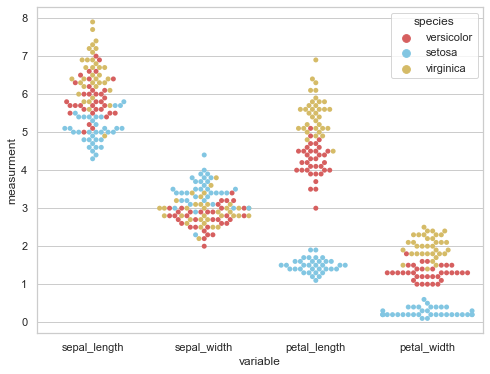

In [67]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(8,6))
# Draw a categorical scatterplot to show each observation
p = sns.swarmplot(x="variable", y="measurment", hue="species",
              palette=["r", "c", "y"], data=train_df)

plt.show()

#### 3. Create 4 subplots (2 rows x 2 columns) of scatterplots

   - sepal_length x sepal_width
   - petal_length x petal_width
   - sepal_area x petal_area
   - sepal_length x petal_length

In [6]:
# I had to formatt my origional df so I am just calling in a new one
df = acquire.get_iris_data(cached=True)
df = prepare.prep_iris(df)
train_df, test_df = train_test_split(df, test_size=.30, random_state=123, stratify=df[['species']])

In [69]:
train_df

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
60,versicolor,5.0,2.0,3.5,1.0,1,0
16,setosa,5.4,3.9,1.3,0.4,0,0
88,versicolor,5.6,3.0,4.1,1.3,1,0
130,virginica,7.4,2.8,6.1,1.9,0,1
6,setosa,4.6,3.4,1.4,0.3,0,0
...,...,...,...,...,...,...,...
58,versicolor,6.6,2.9,4.6,1.3,1,0
41,setosa,4.5,2.3,1.3,0.3,0,0
12,setosa,4.8,3.0,1.4,0.1,0,0
20,setosa,5.4,3.4,1.7,0.2,0,0


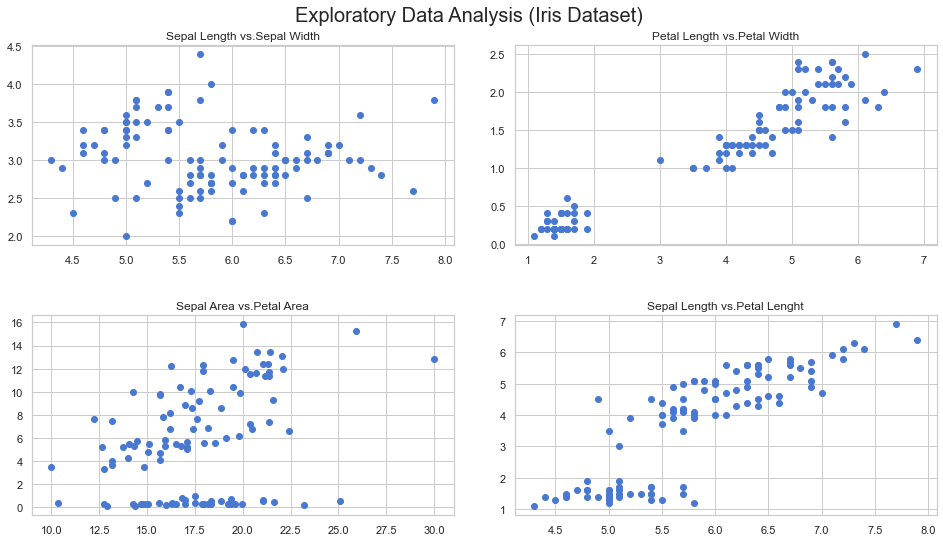

In [70]:
plt.figure(figsize = (14,8))

plt.subplot(2, 2, 1)
x = train_df.sepal_length
y = train_df.sepal_width
plt.scatter(x,y)
plt.title ('Sepal Length vs.Sepal Width')

plt.subplot(2, 2, 2)
x = train_df.petal_length
y = train_df.petal_width
plt.scatter(x,y)
plt.title ('Petal Length vs.Petal Width')

plt.subplot(2, 2, 3)
x = train_df.sepal_length * train_df.sepal_width
y = train_df.petal_length * train_df.petal_width
plt.scatter(x,y)
plt.title ('Sepal Area vs.Petal Area')

plt.subplot(2, 2, 4)
x = train_df.sepal_length
y = train_df.petal_length
plt.scatter(x,y)
plt.title ('Sepal Length vs.Petal Lenght')

plt.suptitle("Exploratory Data Analysis (Iris Dataset)", fontsize = 20)
plt.tight_layout(pad = 3.0)
plt.show ()



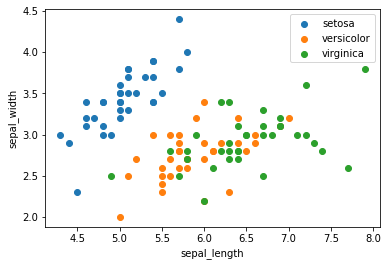

In [7]:
# now with color

def scatter_by_species(x, y):
    for species, subset in train_df.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()

scatter_by_species('sepal_length', 'sepal_width')

In [16]:
train_df['sepal_area'] = train_df.sepal_length * train_df.sepal_width
train_df['petal_area'] = train_df.petal_length * train_df.petal_width

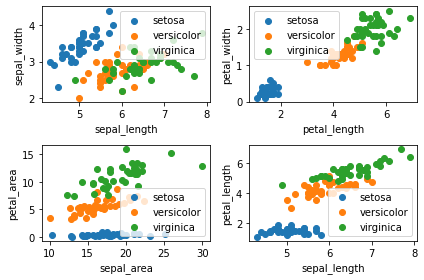

In [12]:
plt.subplot(2, 2, 1)
scatter_by_species('sepal_length', 'sepal_width')
plt.subplot(2, 2, 2)
scatter_by_species('petal_length', 'petal_width')
plt.subplot(2, 2, 3)
scatter_by_species('sepal_area', 'petal_area')
plt.subplot(2, 2, 4)
scatter_by_species('sepal_length', 'petal_length')

plt.tight_layout()

   - Make your figure size 14 x 8. What are your takeaways?
   

  The strongest correlation lies between the variables petal length and petal width
  Weak/Negative between sepal length and width
  Weak/Positive between sepal area and petal area, as well as sepal length and petal length


#### 4. Create a heatmap of each variable layering correlation coefficient on top.

In [13]:
# I want to formatt df so I am just calling in a new one
# df = acquire.get_iris_data(cached=True)
# df = prepare.prep_iris(df)
# train_df, test_df = train_test_split(df, test_size=.30, random_state=123, stratify=df[['species']])
# train_df.drop(columns = ['species_versicolor', 'species_virginica'], inplace = True)

In [17]:
# Compute the correlation matrix
corr = train_df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,-0.125625,0.848911,0.799218,0.644351,0.836788
sepal_width,-0.125625,1.000000,-0.471951,-0.392174,0.672412,-0.329168
petal_length,0.848911,-0.471951,1.000000,0.958196,0.273599,0.954229
petal_width,0.799218,-0.392174,0.958196,1.000000,0.302168,0.982060
sepal_area,0.644351,0.672412,0.273599,0.302168,1.000000,0.376194
petal_area,0.836788,-0.329168,0.954229,0.982060,0.376194,1.000000


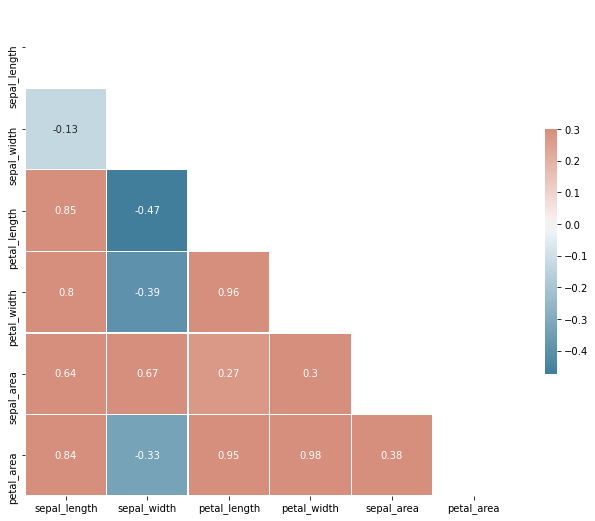

In [18]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

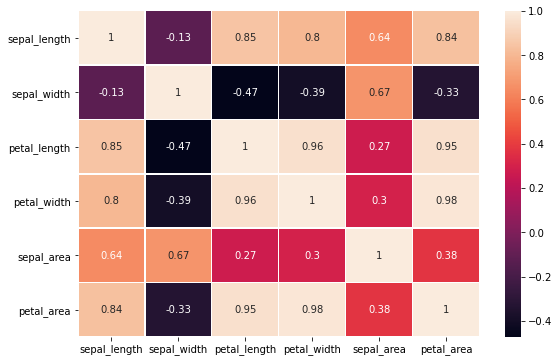

In [19]:
#2nd Heatmap, not sure which to use...
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

#### 5. Create a scatter matrix visualizing the interaction of each variable

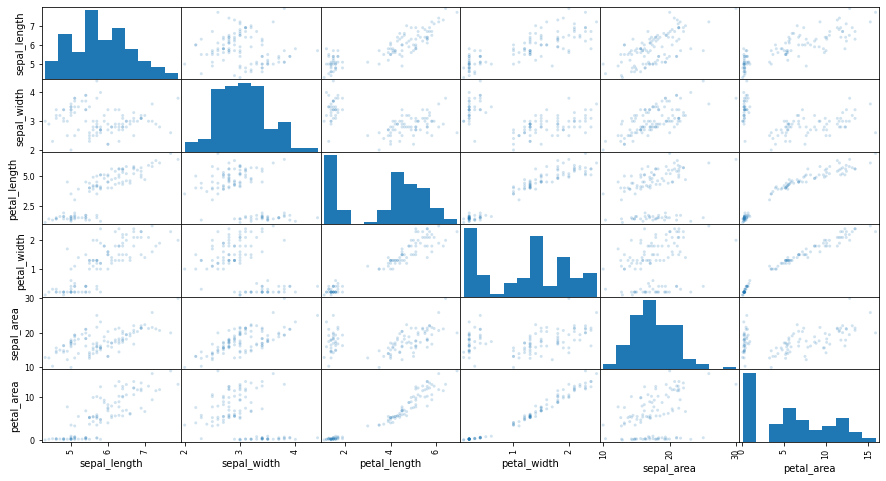

In [20]:
pd.plotting.scatter_matrix(train_df, alpha=0.2, figsize=(15, 8))
plt.show()

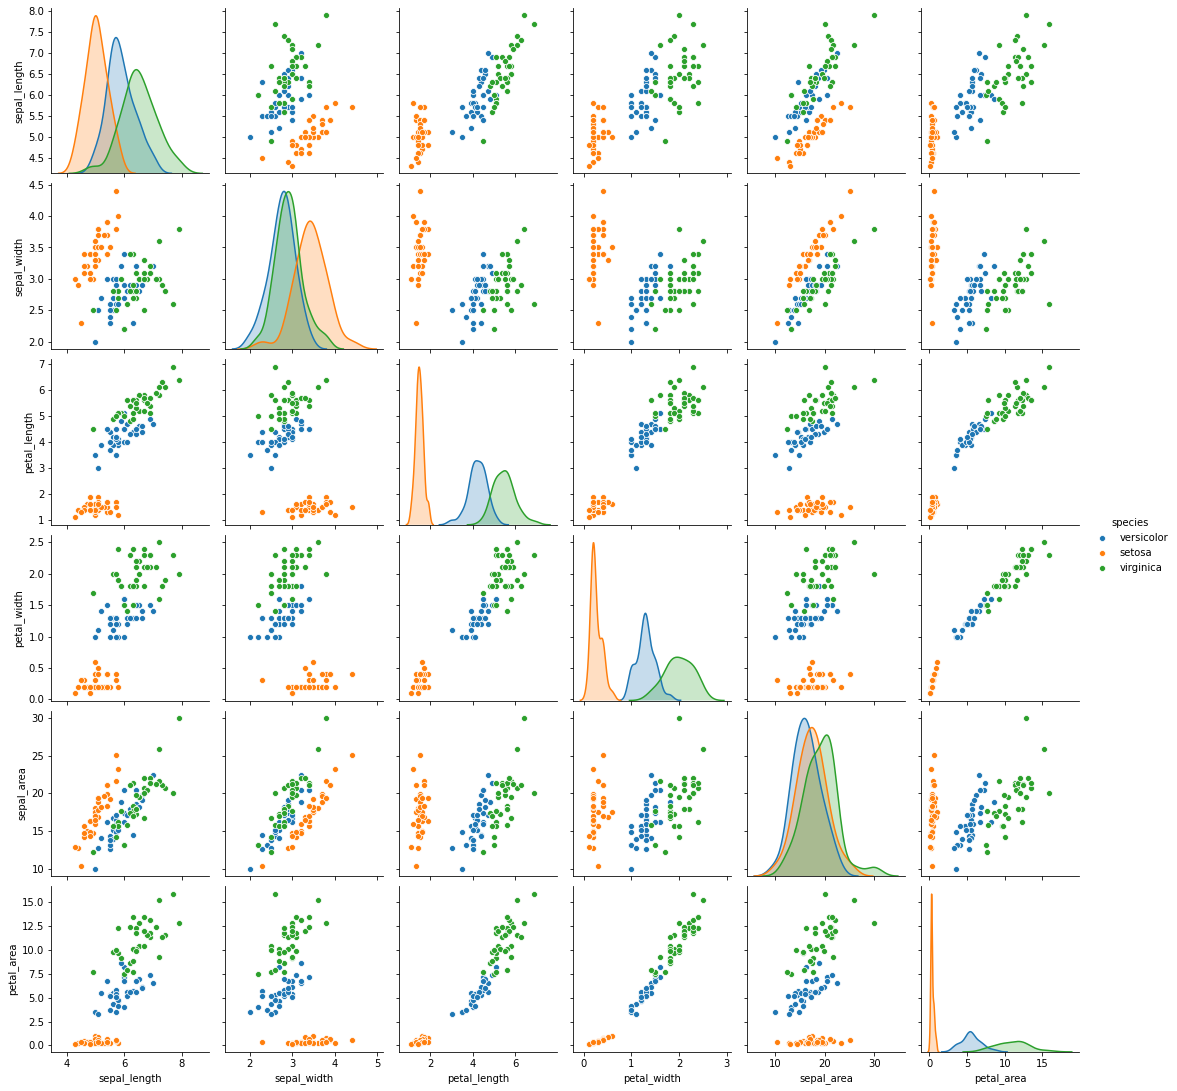

In [22]:
# now with color
sns.pairplot(train_df, hue='species')

#### 6. Is the sepal length significantly different in virginica compared to versicolor? Run an experiment to test this.

   - MUST include null hypothesis, alternative hypothesis, t-test, results, summary
   - alpha = 0.05
   - H0: the difference in sepal length between virginica and versicolor is insignificant.
   - Ha: the difference in sepal length between virginica and versicolor is substantial.
   - We will test if the sepal length of virginica is significantly different than that of the versicolor.
   - If there is difference, then variable sepal_length is a good choice to keep as a feature.
   - We can use a t-test here, as sepal_length is somewhat normally distributed.

In [75]:
train_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
60,versicolor,5.0,2.0,3.5,1.0
16,setosa,5.4,3.9,1.3,0.4
88,versicolor,5.6,3.0,4.1,1.3
130,virginica,7.4,2.8,6.1,1.9
6,setosa,4.6,3.4,1.4,0.3


In [76]:
#checking variance, going to preform test with normalize on and off
train_df.groupby('species').sepal_length.var()

species
setosa        0.136050
versicolor    0.227933
virginica     0.383815
Name: sepal_length, dtype: float64

In [77]:
virginica_sepal_length = train_df[train_df.species == 'virginica'].sepal_length
versicolor_sepal_length = train_df[train_df.species == 'versicolor'].sepal_length

t, p = stats.ttest_ind(virginica_sepal_length, versicolor_sepal_length, equal_var = False)
print(f'''
t = {t:.4f}
p = {p:.8f}
''')


t = 4.6896
p = 0.00001487



P value is less then alpha so we reject null.  Suggest that the difference in sepal length between virginica and versicolor is substantial and that sepal lenght would be a good feature.

### 7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.

In [78]:
virginica_sepal_length = train_df[train_df.species == 'virginica'].petal_length
versicolor_sepal_length = train_df[train_df.species == 'versicolor'].petal_length

t, p = stats.ttest_ind(virginica_sepal_length, versicolor_sepal_length, equal_var = False)
print(f'''
t = {t:.4f}
p = {p:.8f}
''')


t = 11.3783
p = 0.00000000



In [ ]:
here is something new